In [75]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This data set can be found on <a href = "https://data.cityofnewyork.us/Public-Safety/Bureau-of-Fire-Investigations-Fire-Causes/ii3r-svjz"> NYC Open Data Website </a>
    


In [76]:
path = r"C:\Users\Maryla\Desktop\MY_PROJECTS\excel files\Bureau_of_Fire_Investigations_-_Fire_Causes.csv"
fire_original = pd.read_csv(path)
fire_original

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,01/01/2016 12:08:00 AM,Queens,50,08,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,01/01/2016 12:13:00 AM,Staten Island,21,02,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,01/01/2016 12:21:00 AM,Queens,37,05,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,01/01/2016 12:29:00 AM,Bronx,15,12,047,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary
...,...,...,...,...,...,...,...,...,...
32514,2020,12/31/2020 10:44:19 AM,Queens,49,03,115,MD Residential Structure,Incendiary - Combustible Material,Incendiary
32515,2020,12/31/2020 12:57:07 PM,Queens,46,04,110,No Fire,Preliminary Investigation Only,Other
32516,2020,12/31/2020 01:10:30 PM,Queens,49,03,115,PD Residential Structure,Stove - Electric,Appliances
32517,2020,12/31/2020 02:50:01 PM,Manhattan,16,09,030,MD Residential Structure,Incense,Hot Objects


In [77]:
fire_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32519 entries, 0 to 32518
Data columns (total 9 columns):
Case_Year                  32519 non-null int64
Incident_DateTime          32519 non-null object
Borough                    32407 non-null object
Battalion                  29439 non-null object
Community_District         32403 non-null object
Precinct                   32408 non-null object
Incident_Classification    31824 non-null object
Cause_Fire_Description     32499 non-null object
Fire_Code_Category         32510 non-null object
dtypes: int64(1), object(8)
memory usage: 2.2+ MB


In [78]:
columns = [list(fire_original)]
columns

[['Case_Year',
  'Incident_DateTime',
  'Borough',
  'Battalion',
  'Community_District',
  'Precinct',
  'Incident_Classification',
  'Cause_Fire_Description',
  'Fire_Code_Category']]

In [164]:
columns = ['Case_Year','Borough', 'Battalion',
  'Community_District', 
  'Incident_Classification',
  'Cause_Fire_Description',
  'Fire_Code_Category']
for x in columns:
    print(fire_original[x].value_counts())
    print()

2016    7989
2017    7340
2018    6589
2019    6319
2020    4272
2021      10
Name: Case_Year, dtype: int64

Brooklyn          9750
Bronx             7269
Manhattan         6895
Queens            6839
Staten Island     1634
Outside of NYC      20
Name: Borough, dtype: int64

50    1001
54     894
15     867
18     855
46     829
44     821
19     816
38     805
14     799
12     768
41     756
39     753
26     736
49     719
03     698
17     689
27     679
58     676
11     672
51     659
13     642
16     640
52     607
57     597
04     593
43     585
33     584
20     563
10     552
35     550
31     538
21     534
47     520
22     517
45     512
07     485
09     477
40     461
37     448
23     427
06     398
48     395
08     392
53     372
42     361
28     360
32     320
01     286
02     219
BC       4
00       3
SC       1
55       1
TR       1
OP       1
CD       1
Name: Battalion, dtype: int64

01            3573
03            3113
12            3031
05            2781
0

There is way too many categories in "Cause_Fire_Description" to use it for pivot table, but I can work with "Fire_Code_Category" or even "Incident_Classification". 

MD Residential Structure          14754
PD Residential Structure           4638
I wander what does it stand for: MD vs PD. There is no explanation in data dictionary..

### cleaning data
Let's check the data set

In [301]:
#from now on I will be working with new data frame called fire, I want to keep original set unchanged
fire = fire_original.copy()

In [302]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32519 entries, 0 to 32518
Data columns (total 9 columns):
Case_Year                  32519 non-null int64
Incident_DateTime          32519 non-null object
Borough                    32407 non-null object
Battalion                  29439 non-null object
Community_District         32403 non-null object
Precinct                   32408 non-null object
Incident_Classification    31824 non-null object
Cause_Fire_Description     32499 non-null object
Fire_Code_Category         32510 non-null object
dtypes: int64(1), object(8)
memory usage: 2.2+ MB


In [303]:
fire.isnull().sum()
# I am missing 112 in Bourough, let's start with this!


Case_Year                     0
Incident_DateTime             0
Borough                     112
Battalion                  3080
Community_District          116
Precinct                    111
Incident_Classification     695
Cause_Fire_Description       20
Fire_Code_Category            9
dtype: int64

### Fill in missing values for Borough

In [304]:
# I could fill in Borough based on precinct
# but first need a data frame wihout NaN in Precinct column
precinct_no_nan = fire[fire["Precinct"].notnull()]
precinct_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32408 entries, 0 to 32518
Data columns (total 9 columns):
Case_Year                  32408 non-null int64
Incident_DateTime          32408 non-null object
Borough                    32329 non-null object
Battalion                  29387 non-null object
Community_District         32383 non-null object
Precinct                   32408 non-null object
Incident_Classification    31727 non-null object
Cause_Fire_Description     32388 non-null object
Fire_Code_Category         32399 non-null object
dtypes: int64(1), object(8)
memory usage: 2.5+ MB


In [305]:
#create dictionary with precinct number and its borough
precinct_dict = {}
for x, row in precinct_no_nan.iterrows():
    if row["Precinct"] not in  precinct_dict:
        precinct_dict[row["Precinct"]] = row["Borough"]
print (precinct_dict)

{'107': 'Queens', '122': 'Staten Island', '104': 'Queens', '047': 'Bronx', '103': 'Queens', '014': 'Manhattan', '076': 'Brooklyn', '110': 'Queens', '032': 'Manhattan', '083': 'Brooklyn', '018': 'Manhattan', '005': 'Manhattan', '052': 'Bronx', '041': 'Bronx', '049': 'Bronx', '079': 'Brooklyn', '114': 'Queens', '112': 'Queens', '043': 'Bronx', '019': 'Manhattan', '040': 'Bronx', '069': 'Brooklyn', '113': 'Queens', '060': 'Brooklyn', '062': 'Brooklyn', '048': 'Brooklyn', '075': 'Brooklyn', '073': 'Brooklyn', '009': 'Manhattan', '050': 'Bronx', '108': 'Queens', '030': 'Manhattan', '017': 'Manhattan', '101': 'Queens', '078': 'Brooklyn', '063': 'Brooklyn', '105': 'Queens', '068': 'Brooklyn', '084': 'Brooklyn', '045': 'Bronx', '042': 'Bronx', '109': 'Queens', '046': 'Bronx', '088': 'Brooklyn', '028': 'Manhattan', '123': 'Staten Island', '001': 'Manhattan', '066': 'Brooklyn', '077': 'Brooklyn', '111': 'Queens', '071': 'Brooklyn', '067': 'Brooklyn', '026': 'Manhattan', '121': 'Staten Island', '

In [306]:
# fill in Nan in Borough using map funcion
fire["Borough"]= fire["Borough"].fillna(fire["Precinct"].map(precinct_dict))

In [307]:
fire.isnull().sum()

Case_Year                     0
Incident_DateTime             0
Borough                      33
Battalion                  3080
Community_District          116
Precinct                    111
Incident_Classification     695
Cause_Fire_Description       20
Fire_Code_Category            9
dtype: int64

In [308]:
fire[fire["Borough"].isna()]

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
4370,2016,07/20/2016 08:37:39 AM,NaN,07,NaN,NaN,Transit,Preliminary Investigation Only,Other
5979,2016,09/29/2016 01:11:48 PM,NaN,NaN,NaN,NaN,NaN,Preliminary Investigation Only,Other
6101,2016,10/06/2016 09:20:16 AM,NaN,NaN,NaN,NaN,Transit,Preliminary Investigation Only,Other
8815,2017,02/09/2017 10:54:12 PM,NaN,51,NaN,NaN,Aircraft,Preliminary Investigation Only,Other
9725,2017,03/20/2017 04:06:47 PM,NaN,NaN,NaN,NaN,Transformer,Preliminary Investigation Only,Other
12174,2017,07/16/2017 06:25:48 AM,NaN,50,NaN,NaN,No Fire,Preliminary Investigation Only,Other
14869,2017,12/06/2017 09:50:04 AM,NaN,NaN,NaN,NaN,Other,Preliminary Investigation Only,Other
17431,2018,04/13/2018 08:43:16 PM,NaN,NaN,NaN,NaN,NaN,Preliminary Investigation Only,Other
18700,2018,06/21/2018 06:08:19 PM,NaN,44,NaN,NaN,Other,Preliminary Investigation Only,Other
19433,2018,08/02/2018 09:42:46 AM,NaN,50,NaN,NaN,NaN,Preliminary Investigation Only,Other


In [309]:
# I could eliminate some NaN using battalion number
battalion_no_nan = fire[fire["Battalion"].notnull()]

#create dictionary with precinct number and its borough
battalion_dict = {}
for x, row in battalion_no_nan.iterrows():
    if row["Battalion"] not in  battalion_dict:
        battalion_dict[row["Battalion"]] = row["Borough"]
print (battalion_dict)

{'50': 'Queens', '21': 'Staten Island', '37': 'Queens', '15': 'Bronx', '09': 'Manhattan', '32': 'Brooklyn', '46': 'Queens', '16': 'Manhattan', '28': 'Brooklyn', '01': 'Manhattan', '03': 'Bronx', '20': 'Bronx', '57': 'Brooklyn', '49': 'Queens', '10': 'Manhattan', '14': 'Bronx', '58': 'Brooklyn', '43': 'Brooklyn', '48': 'Brooklyn', '39': 'Brooklyn', '44': 'Brooklyn', '06': 'Manhattan', '04': 'Manhattan', '27': 'Bronx', '45': 'Queens', '13': 'Manhattan', '08': 'Manhattan', '47': 'Queens', '31': 'Brooklyn', '51': 'Brooklyn', '54': 'Queens', '42': 'Brooklyn', '07': 'Manhattan', '26': 'Bronx', '19': 'Bronx', '52': 'Queens', '35': 'Brooklyn', '12': 'Manhattan', '23': 'Staten Island', '18': 'Bronx', '40': 'Brooklyn', '53': 'Queens', '38': 'Brooklyn', '41': 'Brooklyn', '11': 'Manhattan', '22': 'Staten Island', '33': 'Brooklyn', '17': 'Bronx', '02': 'Manhattan', '55': 'Brooklyn', '00': 'Brooklyn', 'SC': 'Queens', 'BC': 'Brooklyn', 'OP': 'Brooklyn', 'CD': 'Queens', 'TR': 'Bronx'}


In [310]:
# map it to fill nan
fire["Borough"]= fire["Borough"].fillna(fire["Battalion"].map(battalion_dict))

In [311]:
fire[fire["Borough"].isna()].head()

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
5979,2016,09/29/2016 01:11:48 PM,NaN,NaN,NaN,NaN,NaN,Preliminary Investigation Only,Other
6101,2016,10/06/2016 09:20:16 AM,NaN,NaN,NaN,NaN,Transit,Preliminary Investigation Only,Other
9725,2017,03/20/2017 04:06:47 PM,NaN,NaN,NaN,NaN,Transformer,Preliminary Investigation Only,Other
14869,2017,12/06/2017 09:50:04 AM,NaN,NaN,NaN,NaN,Other,Preliminary Investigation Only,Other
17431,2018,04/13/2018 08:43:16 PM,NaN,NaN,NaN,NaN,NaN,Preliminary Investigation Only,Other


In [312]:
# When Battalion is missing what the the most common Bourough that is assocated with it?
fire_original[fire_original["Battalion"].isna()]["Borough"].mode()

0    Brooklyn
dtype: object

In [313]:
# When Precinct is missing the most common borough is Manhattan
fire_original[fire_original["Precinct"].isna()]["Borough"].mode()

0    Manhattan
dtype: object

In [314]:
# In all 22 cases when  Borough is missing Cause_Fire_Description is eaual to  Preliminary Investigation Only.
# If I explore the oryginal set the most common bourouh for this type of fire couse is Brooklyn

mode_missing_borough = fire_original[fire_original["Cause_Fire_Description"] == "Preliminary Investigation Only"]["Borough"].mode()
mode_missing_borough[0]

'Brooklyn'

In [315]:
# therefore I will fill in remaing missing values with "Brooklyn"
fire["Borough"].fillna(mode_missing_borough[0], inplace =True)

In [316]:
fire.isnull().sum()

Case_Year                     0
Incident_DateTime             0
Borough                       0
Battalion                  3080
Community_District          116
Precinct                    111
Incident_Classification     695
Cause_Fire_Description       20
Fire_Code_Category            9
dtype: int64

### Fill in  Incident classification nan values

In [317]:
#  There is 695 mising values in column Incident_Classification

In [318]:
fire[fire["Incident_Classification"].isna()]

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
4244,2016,07/14/2016 08:34:00 PM,Bronx,NaN,06,048,NaN,Preliminary Investigation Only,Other
4436,2016,07/23/2016 06:40:00 AM,Manhattan,07,05,014,NaN,Preliminary Investigation Only,Other
4438,2016,07/23/2016 08:11:00 AM,Queens,49,01,114,NaN,Preliminary Investigation Only,Other
4446,2016,07/23/2016 05:56:00 PM,Brooklyn,58,18,063,NaN,Preliminary Investigation Only,Other
4455,2016,07/23/2016 09:32:00 PM,Bronx,17,04,044,NaN,Preliminary Investigation Only,Other
...,...,...,...,...,...,...,...,...,...
27642,2019,11/20/2019 10:11:09 AM,Staten Island,21,02,122,NaN,Preliminary Investigation Only,Other
27651,2019,11/20/2019 09:04:02 PM,Brooklyn,40,07,072,NaN,Preliminary Investigation Only,Other
27818,2019,12/02/2019 01:22:44 PM,Brooklyn,48,14,070,NaN,Preliminary Investigation Only,Other
32046,2020,11/15/2020 08:51:17 PM,Manhattan,07,04,010,NaN,Preliminary Investigation Only,Other


In [319]:
fire[fire["Incident_Classification"].isna()]["Cause_Fire_Description"].value_counts()

Preliminary Investigation Only    695
Name: Cause_Fire_Description, dtype: int64

In [320]:
fire[fire["Incident_Classification"].isna()]["Fire_Code_Category"].value_counts()

Other    695
Name: Fire_Code_Category, dtype: int64

In all 695 cases Fire_Code_Category is Other and  Cause_Fire_Description is Preliminary Investigation Only, so  I will find mode based on cobimed cryteria.
Lets try with Fire category first.

In [321]:
mode_Incident_Classification= fire[(fire["Fire_Code_Category"] == "Other" ) & (fire["Fire_Code_Category"])]["Incident_Classification"].mode()
mode_Incident_Classification[0]

'MD Residential Structure'

In [322]:
fire[(fire["Fire_Code_Category"] == "Other" ) & (fire["Fire_Code_Category"])]["Incident_Classification"].value_counts(normalize= True).nlargest(3)

MD Residential Structure    0.391682
PD Residential Structure    0.128223
Burn Notification           0.116459
Name: Incident_Classification, dtype: float64

#### Looks like 52% cases fire is related to some type of residencial location

I will replace this data with the most common classificatin for this particular Couse Fire Description

In [323]:
fire["Incident_Classification"].fillna(mode_Incident_Classification[0], inplace =True)

In [324]:
fire.isnull().sum()

Case_Year                     0
Incident_DateTime             0
Borough                       0
Battalion                  3080
Community_District          116
Precinct                    111
Incident_Classification       0
Cause_Fire_Description       20
Fire_Code_Category            9
dtype: int64

### Fill in null values for Fire Code Category

In [325]:
fire[fire["Fire_Code_Category"].isnull()]

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
234,2016,01/09/2016 03:48:00 PM,Brooklyn,41,14,070,Outside Rubbish,NaN,NaN
373,2016,06/02/2016 12:00:00 AM,Staten Island,NaN,01,121,Commercial Structure,NaN,NaN
621,2016,01/27/2016 01:02:00 AM,Brooklyn,41,14,070,MD Residential Structure,NaN,NaN
691,2016,01/30/2016 06:31:00 AM,Brooklyn,33,15,061,Vehicle,NaN,NaN
1492,2016,03/07/2016 03:19:00 PM,Brooklyn,35,01,088,MD Residential Structure,NaN,NaN
2401,2016,04/18/2016 11:44:00 PM,Queens,39,10,106,Vehicle,NaN,NaN
3020,2016,05/18/2016 11:09:00 AM,Brooklyn,37,04,083,MD Residential Structure,NaN,NaN
3577,2016,06/15/2016 09:07:00 PM,Queens,49,03,115,PD Residential Structure,NaN,NaN
31978,2020,11/09/2020 10:06:34 PM,Manhattan,09,05,018,Manhole,Preliminary Investigation Only,NaN


I will base Fire_Code_Category on Incident_Classification.

I will create dictionary where key will be Incident_Classification and value the most common Fire_Code_Category for this particular classification.

then, I will map it to the fire data set.

In [326]:
Fire_Code_Category_Dictionary = {}

for x, row in fire.iterrows():
    if row["Incident_Classification"] not in  Fire_Code_Category_Dictionary:
        
        Fire_Code_Category_Dictionary[row["Incident_Classification"]] = fire[fire["Incident_Classification"] == row["Incident_Classification"]]["Fire_Code_Category"].mode()[0]

In [327]:
Fire_Code_Category_Dictionary

{'MD Residential Structure': 'Other',
 'PD Residential Structure': 'Electrical',
 'Burn Notification (Albany)': 'Other',
 'Other': 'Other',
 'Burn Notification': 'Other',
 'Outside Rubbish': 'Incendiary',
 'Commercial Structure': 'Electrical',
 'Group Home': 'Incendiary',
 'Vehicle': 'Incendiary',
 'Government Structure': 'Incendiary',
 'Boat': 'Other',
 'MFA': 'No Fire',
 'Garage/Shed': 'Electrical',
 'Hotel': 'Incendiary',
 'Nursing Home': 'Smoking',
 'Brush': 'Incendiary',
 'Hospital': 'Incendiary',
 'Religious Structure': 'Electrical',
 'Manhole': 'Other',
 'School': 'Incendiary',
 'Transit': 'Incendiary',
 'No Fire': 'No Fire',
 'Transformer': 'Other',
 'Street': 'Incendiary',
 'Possible Single Room Occupancy': 'Electrical',
 'Public Hallway': 'Incendiary',
 'Public Structure': 'Incendiary',
 'Threat to Burn': 'No Fire',
 'Sidewalk': 'Incendiary',
 'Construction Trailer': 'Electrical',
 'Aircraft': 'Other',
 'Construction Vehicle': 'Hot Objects',
 'Miscellaneous': 'Incendiary'}

In [328]:
fire["Fire_Code_Category"] =fire["Fire_Code_Category"].fillna(fire["Incident_Classification"].map(Fire_Code_Category_Dictionary))

In [329]:
fire.isnull().sum()


Case_Year                     0
Incident_DateTime             0
Borough                       0
Battalion                  3080
Community_District          116
Precinct                    111
Incident_Classification       0
Cause_Fire_Description       20
Fire_Code_Category            0
dtype: int64

### Fill in for Cause Fire Description

In [330]:
fire[fire["Cause_Fire_Description"].isna()].head()

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
234,2016,01/09/2016 03:48:00 PM,Brooklyn,41,14,070,Outside Rubbish,NaN,Incendiary
373,2016,06/02/2016 12:00:00 AM,Staten Island,NaN,01,121,Commercial Structure,NaN,Electrical
621,2016,01/27/2016 01:02:00 AM,Brooklyn,41,14,070,MD Residential Structure,NaN,Other
691,2016,01/30/2016 06:31:00 AM,Brooklyn,33,15,061,Vehicle,NaN,Incendiary
1492,2016,03/07/2016 03:19:00 PM,Brooklyn,35,01,088,MD Residential Structure,NaN,Other


I will do the same here just I will use different method.

I will create a list of all the missing incident classification values, the I will use for loop to iliterate over the list, find the mode of Cause_Fire_Description based on Fire_Code_Category. 

In the same loop I will authomatically fill in misiing values using fillna.

In [331]:
fire_code_missing = fire[fire["Cause_Fire_Description"].isna()]["Fire_Code_Category"].value_counts()
type( fire_code_missing)
 

pandas.core.series.Series

In [332]:
# Iwant to find mode for each fire category and fillCause_Fire_Description  with the one that matches
list_fire_code_nan =fire_code_missing.index.tolist()
print(list_fire_code_nan)

['Other', 'Incendiary', 'No Fire', 'Electrical', 'Smoking', 'Motors', 'Hot Objects', 'Appliances', 'Cooking Carelessness']


In [333]:
for fire_code in list_fire_code_nan:
    fire_discription_mode= fire[fire["Fire_Code_Category"] == fire_code]["Cause_Fire_Description"].mode()
    fire["Cause_Fire_Description"].fillna(fire_discription_mode[0], inplace = True)
    print("for ", fire_code, "mode is ", fire_discription_mode[0])

for  Other mode is  Preliminary Investigation Only
for  Incendiary mode is  Incendiary
for  No Fire mode is  Other - No Fire
for  Electrical mode is  Electrical Wiring
for  Smoking mode is  Smoking (Cigarette/Cigar)
for  Motors mode is  Motors - Fossil Fuel Powered
for  Hot Objects mode is  Other - Hot Objects
for  Appliances mode is  Clothes Dryer - Natural Gas
for  Cooking Carelessness mode is  Food on the Stove


In [334]:
fire.isnull().sum()

Case_Year                     0
Incident_DateTime             0
Borough                       0
Battalion                  3080
Community_District          116
Precinct                    111
Incident_Classification       0
Cause_Fire_Description        0
Fire_Code_Category            0
dtype: int64

The only 3 left are:
 - Battalion - that I will leave alone,
 - Precinct - also will leave alone
 - Community District  - I will try to fix this one;



### Fill in Community District 

In [335]:
fire[fire["Community_District"].isnull() & fire["Battalion"].isnull()].count()

Case_Year                  52
Incident_DateTime          52
Borough                    52
Battalion                   0
Community_District          0
Precinct                    8
Incident_Classification    52
Cause_Fire_Description     52
Fire_Code_Category         52
dtype: int64

Seems like we can fill in 64 nan by using battalion number (116-52).

It is possible that the same battalions respond to fires in the same district, let's test it first!

In [336]:
columns = [ 'Battalion',
  'Community_District' ]
for x in columns:
    print("There is ", fire_original[x].value_counts().size, x+ "s")
   

There is  56 Battalions
There is  19 Community_Districts


But is it?

In [337]:
fire_original[fire_original["Community_District"] =="04"]

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
5,2016,01/01/2016 12:46:00 AM,Manhattan,09,04,014,MD Residential Structure,Candle,Open Flame
7,2016,01/01/2016 01:46:00 AM,Queens,46,04,110,PD Residential Structure,Smoking (Cigarette/Cigar),Smoking
9,2016,01/01/2016 03:45:00 AM,Brooklyn,28,04,083,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
10,2016,01/01/2016 05:31:00 AM,Manhattan,09,04,018,MD Residential Structure,Candle,Open Flame
11,2016,01/01/2016 08:00:00 AM,Queens,46,04,110,Other,Other - No Fire,No Fire
...,...,...,...,...,...,...,...,...,...
32467,2020,12/28/2020 06:34:36 AM,Bronx,14,04,044,Commercial Structure,Service,Electrical
32475,2020,12/28/2020 01:38:02 PM,Queens,46,04,110,MD Residential Structure,Torch - Legal Use of,Open Flame
32478,2020,12/28/2020 04:31:05 PM,Bronx,19,04,044,MD Residential Structure,Electrical Wiring,Electrical
32503,2020,12/30/2020 04:43:29 PM,Bronx,17,04,044,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking


It looks like there is community district number 04 in each borough.
To make a maping I need to combine both descriptions in separate column to be able to distinguish between 04 in Manhattan and 04 in Brooklyn. 

In [338]:
fire["District_Full_Description"] =  fire['Community_District'] + fire["Borough"] 
fire.head()

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category,District_Full_Description
0,2016,01/01/2016 12:08:00 AM,Queens,50,08,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking,08Queens
1,2016,01/01/2016 12:13:00 AM,Staten Island,21,02,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary,02Staten Island
2,2016,01/01/2016 12:21:00 AM,Queens,37,05,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary,05Queens
3,2016,01/01/2016 12:29:00 AM,Bronx,15,12,047,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other,12Bronx
4,2016,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary,12Queens


   
Is batalion always resonding in the same district ??

I will use previously created data set for battalion :  battalion_no_nan but first I need to update it because now we have a new column.

In [339]:
battalion_no_nan = fire[fire["Battalion"].notnull()]

In [340]:
battalion_vs_community_dictrict_dict2 = {}
for x, row in battalion_no_nan.iterrows():
    #if battalion not in dictionary
    if row["Battalion"] not in  battalion_vs_community_dictrict_dict2:
        new_list=[row["District_Full_Description"]]
        battalion_vs_community_dictrict_dict2[row["Battalion"]] = new_list

    else:
        if row["District_Full_Description"] not in battalion_vs_community_dictrict_dict2[row["Battalion"]]:
            battalion_vs_community_dictrict_dict2[row["Battalion"]].append(row["District_Full_Description"])
        
print (battalion_vs_community_dictrict_dict2)

{'50': ['08Queens', '12Queens', '13Queens', '09Queens', '06Queens', '10Queens', '11Queens', '07Queens', '01Queens', '18Brooklyn', '05Queens', 'Out of NYCQueens', nan, '11Manhattan', '01Brooklyn', '04Queens'], '21': ['02Staten Island', '01Staten Island', '04Brooklyn', '03Staten Island', nan, '10Brooklyn', 'Out of NYCStaten Island', '14Queens'], '37': ['05Queens', '03Brooklyn', '04Brooklyn', '01Brooklyn', '17Brooklyn', '16Brooklyn', '05Brooklyn', '10Queens', '01Staten Island', '07Bronx', '04Manhattan'], '15': ['12Bronx', '07Bronx', '11Bronx', '10Bronx', '08Bronx', '04Bronx', '03Brooklyn', '17Brooklyn', '03Bronx', '09Manhattan', '12Manhattan', '09Bronx'], '09': ['04Manhattan', '05Manhattan', '07Manhattan', '06Manhattan', '11Manhattan', '07Brooklyn', '02Queens', '09Bronx', '03Manhattan', '08Manhattan', '01Manhattan', nan, '12Queens', '09Manhattan'], '32': ['02Brooklyn', '06Brooklyn', '07Brooklyn', '01Brooklyn', '12Brooklyn', '04Brooklyn', nan, '13Queens', '03Manhattan', '01Manhattan', '03B

Looks like this is not the best option, it is probably better to use mode, plus it take a lot of time to run this..

In [341]:
fire[fire["Battalion"] == "07"]["District_Full_Description"].mode()


0    04Manhattan
dtype: object

This is aliging with the info I got from the <a href = "https://boundaries.beta.nyc/?_ga=2.236804097.1038769490.1628000816-241742493.1628000816#">The NYC Boundaries Website</a>

<img src="..\battalion07.PNG" style="width: 500px">

In [342]:
battalion_vs_community_dictrict_dict = {}
for x, row in battalion_no_nan.iterrows():
    if row["Battalion"] not in  battalion_vs_community_dictrict_dict:
        
        battalion_vs_community_dictrict_dict[row["Battalion"]] = fire[fire["Battalion"] == row["Battalion"]]["District_Full_Description"].mode()[0]
  

In [343]:
fire["District_Full_Description"]= fire["District_Full_Description"].fillna(fire["Battalion"].map(battalion_vs_community_dictrict_dict))

In [344]:
fire.isnull().sum()

Case_Year                       0
Incident_DateTime               0
Borough                         0
Battalion                    3080
Community_District            116
Precinct                      111
Incident_Classification         0
Cause_Fire_Description          0
Fire_Code_Category              0
District_Full_Description      52
dtype: int64

Now, I have only 52 missing community districts.
How many of them I can fill in using precinct?

In [346]:
#fire[fire["Community_District"].isnull()]


 
I will leave it for now, 52 missing cases out of 32519 total in fire data set  is not much.
btw, I only fill in new column with the full community district name, since anyway Community_District is only patial indicator of where the distric atually is.           

***
# ANALYSIS
***

##  I want to work with year 2020 first to see what are the trends with fire emergencies through out the year

In [347]:
fire_2020 = fire[fire["Case_Year"] == 2020] 

In [348]:
fire_2020.isnull().sum()

Case_Year                      0
Incident_DateTime              0
Borough                        0
Battalion                    720
Community_District             0
Precinct                       0
Incident_Classification        0
Cause_Fire_Description         0
Fire_Code_Category             0
District_Full_Description      0
dtype: int64

### data analysis


### 1. What objects were the sources of the fire emergencies in nyc in 2020 by the borough

In [131]:
heatmap_data_2020 = fire_2020.pivot_table(index = "Incident_Classification", columns = "Borough", values = "Incident_DateTime", aggfunc=len, fill_value=0, margins = True)


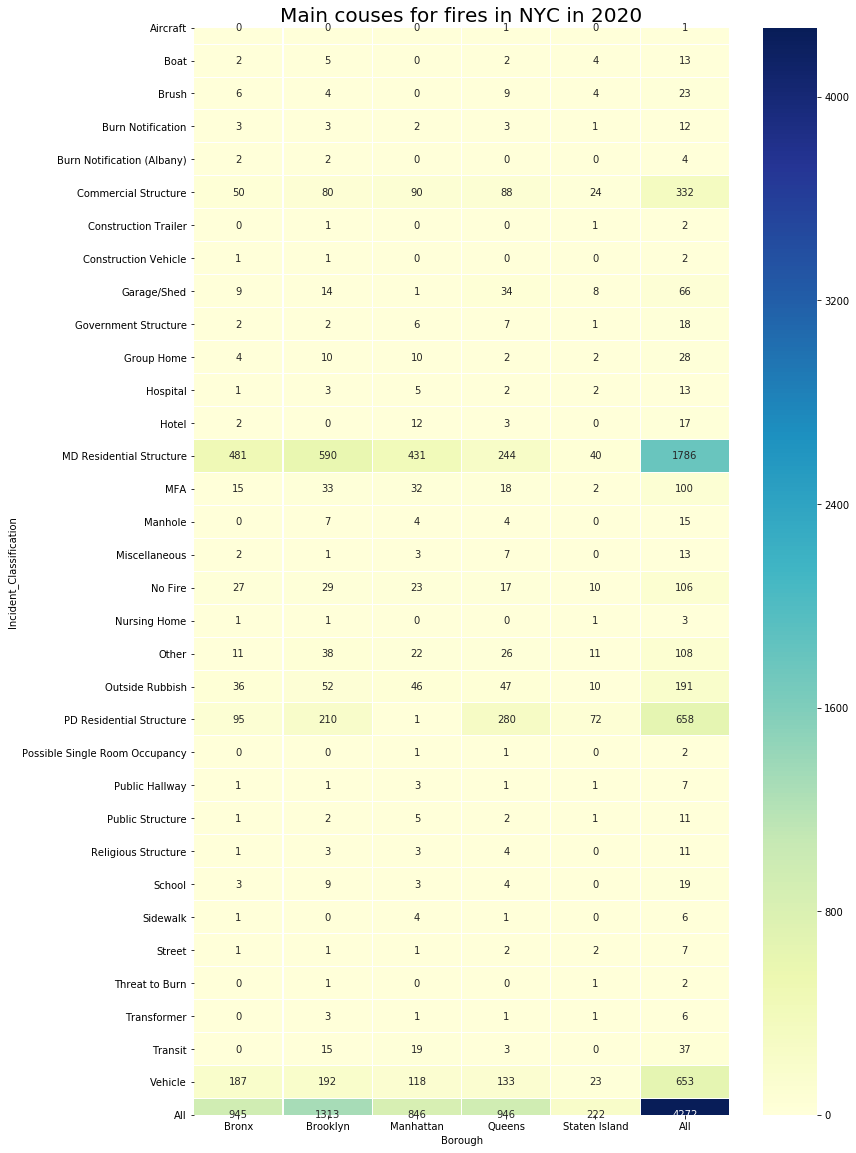

In [234]:
plt.figure(figsize = (12,20))
catskill_displ=sns.heatmap(heatmap_data_2020,  fmt=".0f" , annot=True, cmap="YlGnBu", linewidth=.03)
plt.title("Main couses for fires in NYC in 2020", size=20)
plt.show()

-	Total number of MS residential fires was 1786 cases, with Brooklyn topping the category with 590 cases and Bronx – 481.   
-	Number of PD residential structure fires was 658, with Queens experiencing 280, Brooklyn 210 and only one in Manhattan. 
-	Vehicle fires occurred 653 times mostly in Brooklyn (192) and Bronx (187).
-	Commercial structures were on the fourth place, causing almost equal number of fires in both Brooklyn and Queens, while Staten Island only had 24 cases. 
-	Garages/sheds burned the most in Queens, while rubbish mostly in Brooklyn. 
-	Manhattan had the most transit fires (19), and hospital fires (5) compering with other boroughs.




### What were causes of residencial fires in 2020?


In [350]:
fire_residencial_2020= fire_2020[(fire_2020["Incident_Classification"]== "MD Residential Structure") | (fire_2020["Incident_Classification"]== "PD Residential Structure")  ]

In [351]:
fire_residencial_2020.groupby("Fire_Code_Category").agg({"Cause_Fire_Description":"count"}).sort_values("Cause_Fire_Description", ascending = False)

,Cause_Fire_Description
Fire_Code_Category,
Incendiary,652
Electrical,615
Smoking,262
Other,253
Open Flame,176
Cooking Carelessness,168
Hot Objects,103
Appliances,86
Heaters,32


### What is the distribution of the causes of fire among different boroughs  for residencial buildings. 

In [352]:
fire_residencial_2020.pivot_table(index="Fire_Code_Category", columns = "Borough", values = "Incident_DateTime", aggfunc=len, fill_value=0,  margins = True).sort_values(by=['All'], ascending = False).head(10 )

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
Fire_Code_Category,,,,,,
All,576,800,432,524,112,2444
Incendiary,205,189,133,101,24,652
Electrical,129,218,92,144,32,615
Smoking,60,94,42,50,16,262
Other,52,73,46,67,15,253
Open Flame,38,59,30,43,6,176
Cooking Carelessness,26,49,30,50,13,168
Hot Objects,16,40,23,20,4,103
Appliances,23,25,16,21,1,86


### What were main categories of fires in 2020 in NYC?

In [230]:
fire_2020["Fire_Code_Category"].value_counts()

Incendiary              1293
Electrical               838
Other                    633
Smoking                  389
No Fire                  238
Cooking Carelessness     211
Open Flame               204
Hot Objects              161
Appliances               103
Motors                    65
Heaters                   46
Natural Sources           42
Ignitable                 41
Electrical Devices         8
Name: Fire_Code_Category, dtype: int64

### What was the subject of incendiary fires in 2020 by borough.

In [353]:
detail_pivot_2020 =fire_2020.pivot_table(index=["Fire_Code_Category", "Incident_Classification"], columns = "Borough", values = "Incident_DateTime", aggfunc=len, fill_value=0,  margins = True).sort_values(by=['All'], ascending = False)

In [354]:
detail_pivot_2020.query("Fire_Code_Category==['Incendiary']")

Borough                                            Bronx  Brooklyn  Manhattan  \
Fire_Code_Category Incident_Classification                                      
Incendiary         MD Residential Structure          194       165        133   
                   Vehicle                            92        91         31   
                   Outside Rubbish                    22        31         38   
                   PD Residential Structure           11        24          0   
                   Commercial Structure                8        15         16   
                   Other                               4         6          4   
                   Transit                             0        10         14   
                   Garage/Shed                         3         2          0   
                   Brush                               2         1          0   
                   Government Structure                1         1          5   
                   Group Home                          2         5          3   
                   Hotel                               1         0          4   
                   Public Structure                    1         1          3   
                   Hospital                            1         1          2   
                   Miscellaneous                       1         0          1   
                   Public Hallway                      1         1          3   
                   Sidewalk                            1         0          3   
                   Religious Structure                 0         1          1   
                   Street                              0         0          1   
                   School                              2         1          0   
                   Burn Notification                   1         1          0   
                   Boat                                0         2          0   
                   Threat to Burn                      0         0          0   
                   Possible Single Room Occupancy      0         0          1   
                   Construction Vehicle                0         1          0   
                   Burn Notification (Albany)          1         0          0   

Borough                                            Queens  Staten Island  All  
Fire_Code_Category Incident_Classification                                     
Incendiary         MD Residential Structure            68             18  578  
                   Vehicle                             63              4  281  
                   Outside Rubbish                     33              6  130  
                   PD Residential Structure            33              6   74  
                   Commercial Structure                19              6   64  
                   Other                               14              3   31  
                   Transit                              2              0   26  
                   Garage/Shed                         10              0   15  
                   Brush                                8              3   14  
                   Government Structure                 5              0   12  
                   Group Home                           0              2   12  
                   Hotel                                2              0    7  
                   Public Structure                     1              1    7  
                   Hospital                             2              0    6  
                   Miscellaneous                        4              0    6  
                   Public Hallway                       0              1    6  
                   Sidewalk                             1              0    5  
                   Religious Structure                  2              0    4  
                   Street                               2              1    4  
                   School                          

In [355]:
fire_residencial_2020.pivot_table(index="Fire_Code_Category", columns = "Borough", values = "Incident_DateTime", aggfunc=len, fill_value=0,  margins = True).sort_values(by=['Manhattan'], ascending = False)


Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
Fire_Code_Category,,,,,,
All,576,800,432,524,112,2444
Incendiary,205,189,133,101,24,652
Electrical,129,218,92,144,32,615
Other,52,73,46,67,15,253
Smoking,60,94,42,50,16,262
Cooking Carelessness,26,49,30,50,13,168
Open Flame,38,59,30,43,6,176
Hot Objects,16,40,23,20,4,103
Appliances,23,25,16,21,1,86


### Is there increase/decrease in fire emergencies depending on the time of the year?


In [356]:
fire_2020.head(5) 

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category,District_Full_Description
369,2020,06/11/2020 06:27:00 PM,Brooklyn,43,13,060,MD Residential Structure,Incendiary,Incendiary,13Brooklyn
26307,2020,05/08/2020 07:15:00 AM,Bronx,20,11,049,Commercial Structure,Incendiary - Ignitable Liquid,Incendiary,11Bronx
26309,2020,02/05/2020 06:41:00 PM,Brooklyn,43,13,060,PD Residential Structure,Incendiary,Incendiary,13Brooklyn
26381,2020,04/15/2020 11:46:00 PM,Brooklyn,33,15,061,Commercial Structure,Incendiary,Incendiary,15Brooklyn
26392,2020,01/21/2020 01:26:00 AM,Manhattan,10,11,023,MD Residential Structure,SIU Investigation,Other,11Manhattan


In [357]:
fire_2020["Incident_DateTime"]=pd.to_datetime(fire_2020.Incident_DateTime)

C:\Users\Maryla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [358]:
fire_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 369 to 32518
Data columns (total 10 columns):
Case_Year                    4272 non-null int64
Incident_DateTime            4272 non-null datetime64[ns]
Borough                      4272 non-null object
Battalion                    3552 non-null object
Community_District           4272 non-null object
Precinct                     4272 non-null object
Incident_Classification      4272 non-null object
Cause_Fire_Description       4272 non-null object
Fire_Code_Category           4272 non-null object
District_Full_Description    4272 non-null object
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 367.1+ KB


In [359]:
fire_2020["Incident_DateTime"].dt.weekday_name.value_counts()

Sunday       657
Tuesday      616
Monday       611
Saturday     606
Wednesday    605
Thursday     590
Friday       587
Name: Incident_DateTime, dtype: int64

In [360]:
fire_2020["Incident_DateTime"].dt.time.value_counts().sort_index()

00:00:00    3
00:00:07    1
00:00:12    1
00:01:00    1
00:01:02    1
           ..
23:59:00    1
23:59:04    1
23:59:09    1
23:59:12    1
23:59:52    1
Name: Incident_DateTime, Length: 3922, dtype: int64

In [361]:
fire_2020["month"]=fire_2020["Incident_DateTime"].dt.month

C:\Users\Maryla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [362]:
fire_2020.head()

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category,District_Full_Description,month
369,2020,2020-06-11 18:27:00,Brooklyn,43,13,060,MD Residential Structure,Incendiary,Incendiary,13Brooklyn,6
26307,2020,2020-05-08 07:15:00,Bronx,20,11,049,Commercial Structure,Incendiary - Ignitable Liquid,Incendiary,11Bronx,5
26309,2020,2020-02-05 18:41:00,Brooklyn,43,13,060,PD Residential Structure,Incendiary,Incendiary,13Brooklyn,2
26381,2020,2020-04-15 23:46:00,Brooklyn,33,15,061,Commercial Structure,Incendiary,Incendiary,15Brooklyn,4
26392,2020,2020-01-21 01:26:00,Manhattan,10,11,023,MD Residential Structure,SIU Investigation,Other,11Manhattan,1


In [363]:
all_fire = fire_2020["month"].value_counts().sort_index()
other = fire_2020[fire_2020["Fire_Code_Category"]== "Other"]["month"].value_counts().sort_index()
incendiary = fire_2020[fire_2020["Fire_Code_Category"]== "Incendiary"]["month"].value_counts().sort_index()
heaters = fire_2020[fire_2020["Fire_Code_Category"]== "Heaters"]["month"].value_counts().sort_index()
electrical = fire_2020[fire_2020["Fire_Code_Category"]== "Electrical"]["month"].value_counts().sort_index()
smoking = fire_2020[fire_2020["Fire_Code_Category"]== "Smoking"]["month"].value_counts().sort_index()
open_flame = fire_2020[fire_2020["Fire_Code_Category"]== "Open Flame"]["month"].value_counts().sort_index()
cooking_carelessness = fire_2020[fire_2020["Fire_Code_Category"]== "Cooking Carelessness"]["month"].value_counts().sort_index()

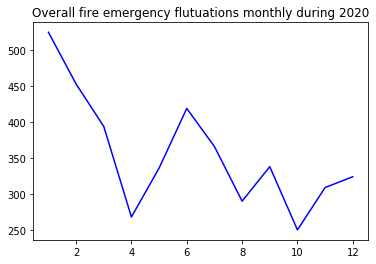

In [364]:
plt.plot(all_fire, color = "b")
plt.title("Overall fire emergency flutuations monthly during 2020")
plt.show()

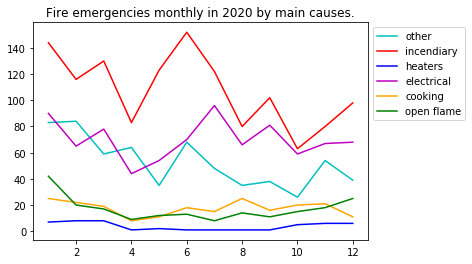

In [365]:
plt.plot(other, color = "c" )
plt.plot(incendiary, color = "r")
plt.plot(heaters, color = "b")
plt.plot(electrical, color = "m")
plt.plot(cooking_carelessness, color = "orange")
plt.plot(open_flame, color = "g")
plt.legend(['other','incendiary', 'heaters', 'electrical', 'cooking', 'open flame'], loc = 0, bbox_to_anchor =(1,1))
plt.title("Fire emergencies monthly in 2020 by main causes.")
plt.show()

In [366]:
#whatare the other category description: 
fire_2020[fire_2020["Fire_Code_Category"] == "Other"]["Cause_Fire_Description" ].value_counts()

Preliminary Investigation Only                       493
SIU Investigation                                     56
Other                                                 34
Exothermic Chemical Reaction                          19
Not Ascertained                                       18
Juvenile Firesetter Intervention                       9
Albany Burn Notif. Related to a Previous BFI Inv.      3
Under Investigation                                    1
Name: Cause_Fire_Description, dtype: int64

In [367]:
fire_2020[fire_2020["Fire_Code_Category"]== "Open Flame"]["Cause_Fire_Description"].value_counts(normalize = True)

Candle                               0.553922
Torch - Legal Use of                 0.161765
Other - Open Flame                   0.107843
Child Playing w/Matches/Lighter      0.073529
Matches/Lighter                      0.063725
Child Playing w/ Other Open Flame    0.024510
Fireplace                            0.009804
Aerosol Can                          0.004902
Name: Cause_Fire_Description, dtype: float64

### Which community district expereinced the most fires in total?

In [368]:
fire_2020["Community_District"].value_counts()

01            471
03            410
12            386
05            384
04            293
02            280
06            259
09            252
07            238
10            237
08            214
11            201
13            163
14            142
17            113
16             91
18             63
15             60
Out of NYC     15
Name: Community_District, dtype: int64

***
## Exploring data in other years
***

In [369]:
fire_2016 = fire[fire["Case_Year"] == 2016]
fire_2017 = fire[fire["Case_Year"] == 2017]
fire_2018 = fire[fire["Case_Year"] == 2018]
fire_2019 = fire[fire["Case_Year"] == 2019]